In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [2]:
d_parser=lambda x:pd.datetime.strptime(x,'%m/%d/%y %H:%M')
df=pd.read_csv('E:/Download/UPX/Summer_Analytics/2/Chicago_Crime_Detective.csv',dtype='unicode',index_col='ID',parse_dates=['Date'],date_parser=d_parser )
#,index_col='ID'

In [3]:
#drop the unnamed column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
ID,,,,,,,,
8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [5]:
df.dtypes

Date                   datetime64[ns]
LocationDescription            object
Arrest                         object
Domestic                       object
Beat                           object
District                       object
CommunityArea                  object
Year                           object
dtype: object

In [6]:
df.shape

(191641, 8)

In [7]:
df.isnull().sum()

Date                       0
LocationDescription        0
Arrest                     0
Domestic                   0
Beat                       0
District               43052
CommunityArea          24603
Year                       0
dtype: int64

In [8]:
#df['Date'] =pd.to_datetime (df['Date']) #command can not parse the date
#df['Date'] = pd.to_datetime(df['Date'],format ='%m/%d/%y %H:%M')
#df['Date']

In [9]:
#df.loc[0,'Date'].day_name()
#df['Date'].dt.day_name().value_counts().sort_values()

# 1.
What is the Month and Year of the median date in our dataset?


In [98]:
df['Date'].astype('datetime64[ns]').quantile(.5)

Timestamp('2006-05-21 12:30:00')

# 2.
In which month did the lowest motor vehicle thefts occur?

In [100]:


#df.groupby(pd.Grouper(key='Date', freq='M')).count()
#df.groupby(df['Date'].dt.strftime('%B'))['Year'].count().sort_values()

df.groupby(df['Date'].dt.strftime('%B'))['Arrest'].count().sort_values(ascending=True)

#df.groupby(df['Date'].dt.strftime('%B'))['Arrest'].count().sort_values(ascending=False).plot(kind='bar')

Date
February     13511
April        15280
March        15758
June         16002
May          16035
January      16047
September    16060
November     16063
December     16426
August       16572
July         16801
October      17086
Name: Arrest, dtype: int64

# 3. 
On which weekday did most motor vehicle thefts occur? *


In [12]:
#df.loc[0,'Date'].day_name()
#df['dayofweek']=df['Date'].dt.day_name() #find day of the week of each day?

df['Date'].dt.day_name().value_counts().sort_values()

Sunday       26316
Tuesday      26791
Saturday     27118
Thursday     27319
Monday       27397
Wednesday    27416
Friday       29284
Name: Date, dtype: int64

# 4.
Each observation in the dataset represents a motor vehicle theft, 
and the Arrest variable indicates whether an arrest was later made for this theft. 
Which month has the largest number of motor vehicle thefts for which an arrest was made? *


In [13]:
#week_df = df.groupby(df['Date'].dt.weekday_name)


#df.groupby(df['Date'].dt.strftime('%a'))['Arrest'].value_counts().sort_values() -- day wise count
#df.groupby(df['Date'].dt.strftime('%Y'))['Arrest'].value_counts().sort_values(ascending=False)   year wise

df.groupby(df['Date'].dt.strftime('%B'))['Arrest'].value_counts(normalize=True).sort_values(ascending=False)



Date       Arrest
May        False     0.925974
June       False     0.923135
September  False     0.922291
November   False     0.921808
October    False     0.921456
July       False     0.921195
August     False     0.919804
April      False     0.918063
March      False     0.917629
December   False     0.914952
January    False     0.910575
February   False     0.908371
           True      0.091629
January    True      0.089425
December   True      0.085048
March      True      0.082371
April      True      0.081937
August     True      0.080196
July       True      0.078805
October    True      0.078544
November   True      0.078192
September  True      0.077709
June       True      0.076865
May        True      0.074026
Name: Arrest, dtype: float64

In [14]:
df['Year'].value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

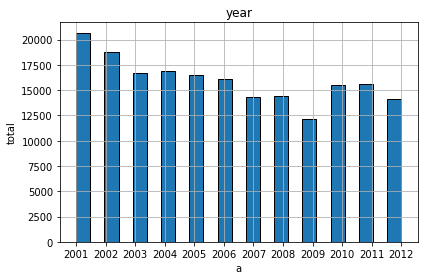

In [15]:
year_grp=df.groupby(['Year'])

x=df['Year'].sort_values(ascending=True)

plt.hist(x, edgecolor='black',bins=23)

#plt.legend()

plt.title('year')
plt.xlabel('a')
plt.ylabel('total')
plt.grid()
plt.tight_layout()

plt.show()

# 6.
Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? *
(Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

In [16]:
year_grp=df.groupby(['Year'])

In [17]:
arrest_grp=df.groupby('Arrest')
arrest_grp['Year'].value_counts().loc['True']


Year
2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: Year, dtype: int64

In [18]:
#year_grp['Arrest'].value_counts().sort_values()

# 7.
For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [19]:
df.groupby(df['Date'].dt.strftime('%Y'))['Arrest'].value_counts(normalize=True).sort_values(ascending=False)

Date  Arrest
2012  False     0.960971
2011  False     0.960031
2010  False     0.954765
2009  False     0.930961
2008  False     0.929387
2006  False     0.919120
2007  False     0.915126
2005  False     0.907304
2004  False     0.899597
2001  False     0.895883
2003  False     0.892057
2002  False     0.887218
      True      0.112782
2003  True      0.107943
2001  True      0.104117
2004  True      0.100403
2005  True      0.092696
2007  True      0.084874
2006  True      0.080880
2008  True      0.070613
2009  True      0.069039
2010  True      0.045235
2011  True      0.039969
2012  True      0.039029
Name: Arrest, dtype: float64

# 8.
For what proportion of motor vehicle thefts in 2007 was an arrest made? (round your answer to 2 decimal places)

In [20]:
#same as question 6 
# 2007  True      0.084874

# 9.
Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? 

In [21]:
locality=df['LocationDescription'].value_counts().sort_values(ascending=False)
locality.head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

# 10.
Create a subset of your data, only taking observations for which the theft happened in one of 
these five locations, and call this new data set "Top5". How many observations are in Top5?

In [22]:
local=df.groupby('LocationDescription')
#loc.get_group('STREET','ALLEY')
Top5=pd.concat([group for (name, group) in local if name in 
                ['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL']])
Top5.count()

Date                   177510
LocationDescription    177510
Arrest                 177510
Domestic               177510
Beat                   177510
District               137526
CommunityArea          154663
Year                   177510
dtype: int64

# 11.
On which day of the week do the most motor vehicle thefts at gas stations happen? *

In [97]:
days_group=Top5.groupby(Top5['Date'].dt.strftime('%A'))
days_group['LocationDescription'].apply(lambda x: 
                               x.where(Top5['LocationDescription']=='GAS STATION').value_counts()).sort_values(ascending=False)

Date                  
Saturday   GAS STATION    338
Sunday     GAS STATION    336
Friday     GAS STATION    332
Thursday   GAS STATION    282
Monday     GAS STATION    280
Wednesday  GAS STATION    273
Tuesday    GAS STATION    270
Name: LocationDescription, dtype: int64

In [23]:
#df.groupby(df['Date'].dt.strftime('%a'))['Arrest'].value_counts().sort_values()
#Top5.groupby(Top5['Date'].dt.strftime('%A'))['LocationDescription'].value_count().sort_values()

In [83]:
f=Top5.groupby(Top5['Date'].dt.strftime('%A'))
#f['LocationDescription'].value_counts().sort_values()
 

In [25]:
#df['Date'].dt.day_name().value_counts().sort_values()
b=Top5['Date'].dt.day_name()
a=Top5.groupby('LocationDescription')
#a['Date'].loc['GAS STATION ']
